## Races over time

This section aims to explore the number of Formula 1 races held each year and track the trend over time. By visualizing this trend, we can gain insights into how the frequency of races has changed and identify any notable patterns or shifts in the F1 calendar.

To begin this analysis, I will first import the necessary libraries and load the cleaned data from the pickle file created during the data wrangling process.

In [1]:
# Libraries
import pandas as pd
import pickle
from util import quality_check
# plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from IPython.display import Image, display
image_path = 'C:\\Users\\zonca\\Desktop\\Course\\F1\\plots\\'

# Load the database
with open('cleaned_data.pkl', 'rb') as f:
    data = pickle.load(f)

database = data['database']
races = database['races']
circuits = database['circuits']
countries_continents = database['countries_continents']

Let's start by focusing on the `races` dataframe.

In [2]:
display(races.head())
quality_check(races)

,id,year,round,grandPrixId,officialName,qualifyingFormat,sprintQualifyingFormat,circuitId,circuitType,courseLength,laps,distance,scheduledLaps,scheduledDistance
0,1,1950,1,great-britain,1950 RAC British Grand Prix,TWO_SESSION,NaN,silverstone,RACE,4.649,70,325.430,NaN,NaN
1,2,1950,2,monaco,Grand Prix de Monaco 1950,TWO_SESSION,NaN,monaco,STREET,3.181,100,318.100,NaN,NaN
2,3,1950,3,indianapolis,1950 Indianapolis 500,FOUR_LAPS,NaN,indianapolis,RACE,4.023,138,555.224,200.0,804.672
3,4,1950,4,switzerland,Grosser Preis der Schweiz 1950,TWO_SESSION,NaN,bremgarten,ROAD,7.280,42,305.760,NaN,NaN
4,5,1950,5,belgium,1950 Belgian Grand Prix,TWO_SESSION,NaN,spa-francorchamps,ROAD,14.120,35,494.200,NaN,NaN


DataFrame Quality Check Summary
----------------------------------------
Number of rows: 1125
Number of columns: 14
----------------------------------------
Null values:
sprintQualifyingFormat    1113
scheduledLaps             1049
scheduledDistance         1049
dtype: int64


It appears that a significant number of columns contain null values. However, these missing values are limited to columns related to the sprint qualifying format (which was introduced only in 2021), and the scheduled laps and distance. As these columns do not affect the race count, they will not impact the analysis. Therefore, I will proceed with grouping the data by year to count the number of races held each year and visualize the trend with a plot.

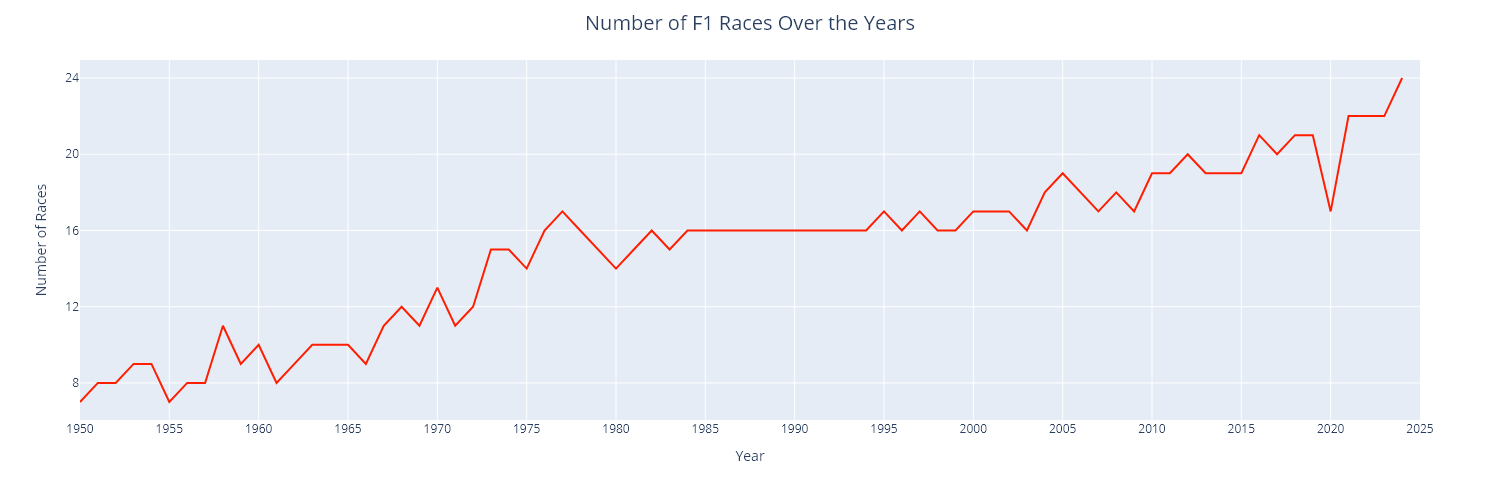

In [6]:
races_per_year = races.groupby('year').size().reset_index(name='number of races')

races_per_year_fig = px.line(
        data_frame=races_per_year,
        x='year',
        y='number of races',
        labels={'year':'Year', 'number of races':'Number of Races'},
        height=500,
        width=1500)

races_per_year_fig.update_traces(
        line=dict(color='#FF1E00'),
        hovertemplate='<b>Year</b>: %{x}<br>' +
                '<b>Number of races</b>: %{y}<br>',
        hoverlabel=dict(
        font=dict(size=12),
        bgcolor='rgba(255, 255, 255, 1)'
        ))

races_per_year_fig.update_layout(
        title=dict(
                text='Number of F1 Races Over the Years',
                x=0.5,
                font=dict(size=20)
        ),
        xaxis=dict(
                dtick=5,
                range=[races_per_year['year'].min(), races_per_year['year'].max() + 1]
        ),
        yaxis=dict(
                tickmode='linear',
                dtick=4
        ))

races_per_year_fig.show()

pio.write_image(races_per_year_fig, image_path+'races_per_year.png', width=1500, height=500)
display(Image(filename=image_path+'races_per_year.png'))

The data reveals a general upward trend over the years.

In the 1970s, in particular, the calendar expanded significantly, driven by the sport's growing global popularity and the increasing number of available circuits. However, between 1978 and 1980, a noticeable decline in the number of races occurred, followed by a plateau with minor fluctuations of 1-2 races per year until 2003. This decline and the subsequent plateau were influenced by the economic constraints of the early 80s, including the aftermath of the oil crisis, which impacted financial resources and logistical capabilities. During this time, the sport faced challenges such as a limited number of suitable circuits and the complexities of organizing international events, which led to the introduction of tighter regulations focused on safety and cost control.

The early 2000s marked a resurgence in the number of races, driven by the commercialization of the sport and the introduction of new Grand Prix events in emerging markets. This upward trend accelerated particularly after 2020, driven in part by the release of the Netflix series *Drive to Survive* in 2019. The post-2020 period reflects Formula 1's strategic efforts to adapt to new audiences while capitalizing on the increased exposure and broadcasting opportunities. In response to the growing global demand and heightened interest from viewers, the sport has expanded its calendar accordingly, reaching a record-breaking 24 races per year in 2024.

Interestingly, the sharp rise after 2020 followed a significant drop in that year (2020), primarily due to the global COVID-19 pandemic, which led to widespread cancellations and postponements as a result of travel restrictions and health concerns. The COVID-19 pandemic is a notable example of how Formula 1's racing calendar has been influenced by external factors throughout its history, whether political or environmental:
- In 1976, the Argentinian Grand Prix was canceled due to political unrest in the country;
- In 2011, the Bahrain Grand Prix was canceled due to the Bahraini uprising during the Arab Spring protest;
- In 2022, the Russian Grand Prix was canceled following the Russian invasion of Ukraine;
- In 2023, the Emilia-Romagna Grand Prix at Imola was canceled due to sever flooding in the region.

Unfortunately, many of these cancellations are not always reflected in the data, as they are often replaced by other Grand Prix events during the season.

### Races by Continent

Having explored the overall trend in the number of Formula 1 races held each year, the next step is to delve deeper into the geographical distribution of these races. This analysis will focus on grouping the races by continent and year to identify regional trends and shifts in the F1 calendar.

By examining the data continent-wise, the aim is not only to highlight which continents have historically hosted more races, but to provide also insights into how the global distribution of races has evolved, particularly during periods of significant calendar expansion.

The dataframes used for this analysis are `circuits`, `countries_continents` and once again `races`.

In [7]:
display(circuits.head())
quality_check(circuits)

,id,name,fullName,previousNames,type,placeName,countryId,latitude,longitude,totalRacesHeld
0,adelaide,Adelaide,Adelaide Street Circuit,NaN,STREET,Adelaide,australia,-34.927222,138.617222,11
1,aida,Aida,Okayama International Circuit,TI Circuit Aida,RACE,Aida,japan,34.915000,134.221111,2
2,ain-diab,Ain-Diab,Ain-Diab Circuit,NaN,ROAD,Casablanca,morocco,33.578611,-7.687500,1
3,aintree,Aintree,Aintree Motor Racing Circuit,NaN,ROAD,Aintree,united-kingdom,53.476944,-2.940556,5
4,anderstorp,Anderstorp Raceway,Anderstorp Raceway,Scandinavian Raceway,RACE,Anderstorp,sweden,57.264167,13.601389,6


DataFrame Quality Check Summary
----------------------------------------
Number of rows: 77
Number of columns: 10
----------------------------------------
Null values:
previousNames    62
dtype: int64


In [8]:
display(countries_continents.head())
quality_check(countries_continents)

,countryId,name_country,continentId,name_continent
0,afghanistan,Afghanistan,asia,Asia
1,aland-islands,Åland Islands,europe,Europe
2,albania,Albania,europe,Europe
3,algeria,Algeria,africa,Africa
4,american-samoa,American Samoa,australia,Australia


DataFrame Quality Check Summary
----------------------------------------
Number of rows: 249
Number of columns: 4
----------------------------------------
Null values: 0


The `circuits` dataframe contains some null values, but the only column affected is the one for previous circuit names, which does not impact the analysis. Additionally, I noticed that Oceania is mistakenly referred to as Australia in the data, and I will correct this later in the code.

Since the `races` dataframe has already been checked and presents no issues for the analysis, the next step is to join these dataframes. Following the merge, I will count and visualize the number of races held annually in each continent.

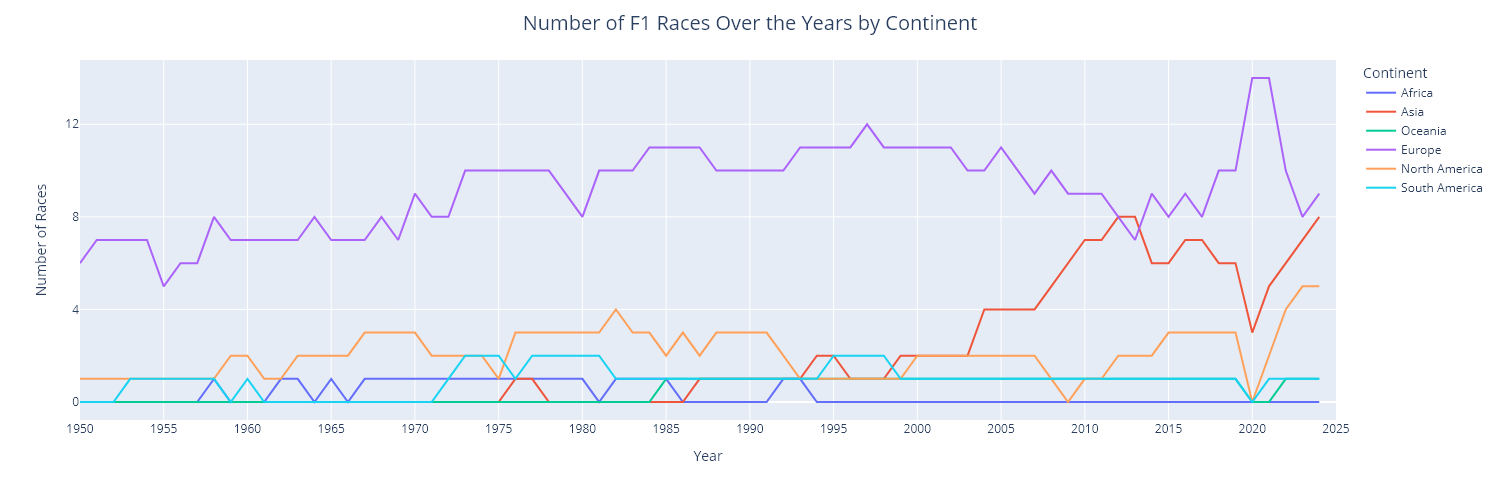

In [9]:
# Merge circuits with countries_continents to get the continent for each circuit
circuits_continent = pd.merge(
    circuits[['id', 'countryId']],
    countries_continents[['countryId', 'name_continent']],
    on='countryId',
    how='left')

# Merge circuits_continent with races to associate races with their continents
races_continent = pd.merge(
    circuits_continent[['id', 'name_continent']],
    races[['year', 'circuitId']],
    left_on='id', right_on='circuitId',
    how='left')

races_continent_pivot = pd.pivot_table(
    data=races_continent,
    index='year',
    columns='name_continent',
    aggfunc='size',
    fill_value=0)

races_continent_flat = races_continent_pivot.rename(columns={'Australia':'Oceania'}).reset_index()

races_year_continent_fig = px.line(
    data_frame=races_continent_flat,
    x='year',
    y=races_continent_flat.columns[1:],
    labels={'year':'Year', 'value':'Number of Races', 'variable':'Continent'},
    height=500,
    width=1500)

races_year_continent_fig.update_layout(
    title=dict(
        text='Number of F1 Races Over the Years by Continent',
        x=0.5,
        font=dict(size=20)),
    xaxis=dict(
        dtick=5,
        range=[races_continent_flat['year'].min(), races_continent_flat['year'].max() + 1]
        ),
    yaxis=dict(
        tickmode='linear',
        dtick=4
        ),
    hovermode='x unified',
    hoverlabel=dict(
        font=dict(size=12),
        bgcolor='rgba(255, 255, 255, 0.8)'
        ))

races_year_continent_fig.update_traces(
    hovertemplate='<b>%{fullData.name}</b><br>' +
                'Number of Races: %{y}<extra></extra>')

races_year_continent_fig.show()

pio.write_image(races_year_continent_fig, image_path+'races_year_continent.png', width=1500, height=500)
display(Image(filename=image_path+'races_year_continent.png'))

Building on the earlier analysis of F1 races over the years, examining the data by continent offers a nuanced understanding of the sport's global dynamics and of the trends previously observed.

#### Europe
Europe has consistently dominated the F1 calendar, reflecting its central role in the sport's development, its position as the primary market, and its substantial influence. This dominance is not surprising given Europe's historical involvement in F1, with most teams, iconic circuits, and many of the sport’s most famous and successful drivers hailing from Europe.

However, the data also reveals that other regions, particularly Asia and, to a lesser extent, North America, have begun to challenge this long-standing supremacy.

#### Asia
Previously, it was noted that the turn of the millennium marked a resurgence in F1 races. Now, it becomes clear that Asia was the primary beneficiary of this expansion, transitioning from minimal or no representation on the F1 calendar before the 2000s, to becoming a key player in the new millennium. This growth can be attributed to substantial investments and partnerships from emerging markets in the region, particularly China and the Middle East.

By 2012, the number of races in Asia equaled that of Europe, and in 2013, Asia even surpassed Europe for the first and only time as the continent with most races. Although Europe regained the lead the following year, Asia's presence on the F1 calendar has continued to grow since 2020, narrowing the gap with the Old Continent. The once-emerging markets in Asia have now matured significantly, solidifying their positions as major players in the F1 landscape.

#### North America
Despite being one of the wealthiest continents with a rich motor-sport tradition, North America's presence in F1 has been relatively minimal until recently. Starting with just one race in the inaugural season of F1, the number of North American races has since fluctuated between one and three per seasons over the decades, peaking at four in 1982. While motor-sport has always been popular in the region, the data confirms that American audiences have traditionally favored domestic series like IndyCar, which bears similarities to F1.

In recent years, however, this trend has shifted: by 2022, North America once again reached its 1982 peak of four races, increasing to five by 2023 and 2024. This upward trajectory is likely to continue, driven by ongoing negotiations for additional races on the continent. North America's growing interest in F1 can be attributed to various factors, such as a rise in American viewership, sparked by the success of the Netflix series *Drive to Survive*, and the entry of Haas into F1 in 2016, marking the return of an American team to the grid after more than two decades. More notably, Liberty Media, an american mass media company, acquired the Formula One Group in 2017 and has since been responsible for promoting the F1 World Championship and overseeing the sport’s commercial rights.

#### Race Distribution: A New Perspective on Previous Findings
A pattern missing from this more granular analysis is the plateau observed between the 1980s and the early 2000s. Rather than a long period of stability, the data reveals minor fluctuations between regions, with continents seemingly exchanging race slots over time. As mentioned previously, stricter safety and cost regulations were introduced in the 1980s and 1990s, limiting the potential for a significant calendar expansion. Additionally, F1 management sought to maintain a balance between established markets like Europe and North America, and emerging regions. What initially appeared to be a static period in terms of total race numbers was actually a deliberate effort to balance the calendar, by redistributing races across different continents, while avoiding a dramatic increase in the total number of races (and associated costs) each season.

As previously noted, the COVID-19 pandemic led to a drastic reduction in the number of races due to global travel restrictions and health concerns. This decline is still evident when examining the number of races over the years by continent, but interestingly, not for all regions.While most continents experienced a significant drop in the number of races, with many falling to zero (excluding Asia), Europe achieved a record high of 14 races, accounting for over 80% of the 17 races that year. This exceptional situation not only reinforces Europe’s central role in the sport but also but also highlights the importance of logistics in Formula 1. In fact, when considering the logistical complexities of hosting a Grand Prix, it becomes clear why Europe has historically been the stronghold of Formula 1: drivers and cars travel alongside teams of engineers and mechanics, as well as specialized equipment and car parts. With most constructors based in Europe, the shorter travel radius has consistently made it a logical choice to concentrate races in this region, especially during times of economic hardship or travel restrictions, such as those imposed during the COVID-19 pandemic.

#### Africa, Oceania and South America
Trends in these three continents are less pronounced and harder to discern due to the relatively smaller number of races held in these regions. Although their overall impact on the F1 calendar appears minimal compared to Europe, Asia, and North America, a more detailed visualization may uncover additional insights and provide a clearer understanding of the dynamics in these areas.

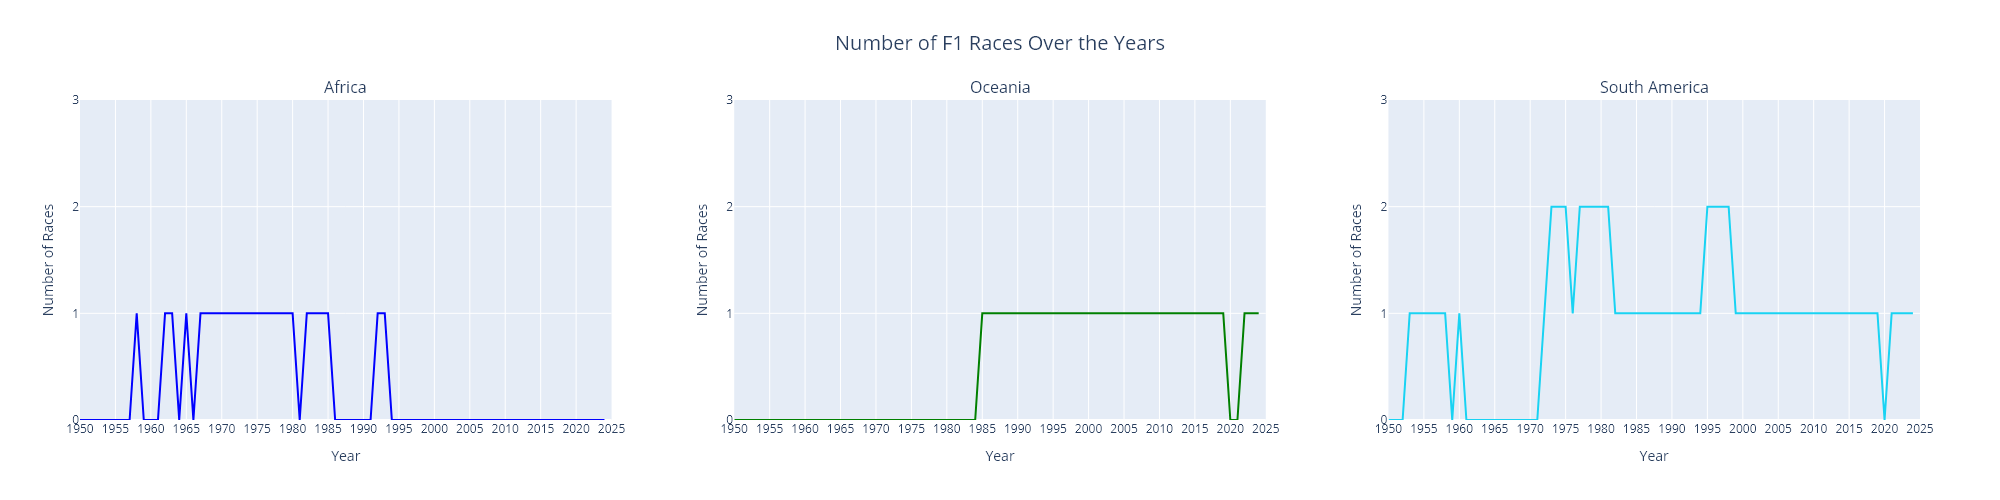

In [11]:
races_year_continent_detail_fig = make_subplots(rows=1, cols=3, subplot_titles=("Africa", "Oceania", "South America"))

races_year_continent_detail_fig.add_trace(
    go.Scatter(
        x=races_continent_flat['year'],
        y=races_continent_flat['Africa'],
        mode='lines', 
        name='Africa',
        line=dict(color='blue'),
    ),
    row=1, col=1)

races_year_continent_detail_fig.add_trace(
    go.Scatter(
        x=races_continent_flat['year'],
        y=races_continent_flat['Oceania'],
        mode='lines', 
        name='Oceania',
        line=dict(color='green'),
    ),
    row=1, col=2)

races_year_continent_detail_fig.add_trace(
    go.Scatter(
        x=races_continent_flat['year'],
        y=races_continent_flat['South America'], 
        mode='lines', 
        name='South America',
        line=dict(color='#19d3f3'),
    ),
    row=1, col=3)

races_year_continent_detail_fig.update_layout(
    title=dict(
        text='Number of F1 Races Over the Years',
        x=0.5,
        font=dict(size=20)
    ),
    height=500,
    width=2000,
    showlegend=False,
    hoverlabel=dict(
        font=dict(size=12),
        bgcolor='rgba(255, 255, 255, 0.8)'
    ))

races_year_continent_detail_fig.update_traces(
    hovertemplate='<b>Year</b>: %{x}<br>' +
                '<b>Number of races</b>: %{y}<br><extra></extra>')

races_year_continent_detail_fig.update_xaxes(
    dtick=5,
    range=[races_continent_flat['year'].min(), races_continent_flat['year'].max() + 1],
    title_text='Year')

races_year_continent_detail_fig.update_yaxes(
    tickmode='linear',
    range=[0, 3],
    title_text='Number of Races')

races_year_continent_detail_fig.show()

pio.write_image(races_year_continent_detail_fig, image_path+'races_year_continent_detail.png', width=2000, height=500)
display(Image(filename=image_path+'races_year_continent_detail.png'))

A few trends become clearer upon closer examination:
- Africa hosted a single race per year between 1958 and 1993, though not consistently, with about 10 of those years without any races. Since 1994, there have been no Formula 1 events on the continent;
- Oceania shows the most straightforward trend, joining the F1 calendar in 1985 with one race per year and continuining with one race per year to this day, with the only exceptions being the 2020 and 2021 seasons, likely due to the COVID-19 pandemic;
- South America has been hosting one race a year since 1953, the very early days of Formula 1, sometimes 2 races a year between the 1970s and 1990s but also missing from the calendar for a long ten-year period from 1961 to 1971.

Although these continents are vastly different, the low number or nonexistent number of races in each region likely points to a common factor: the substantial costs associated with hosting a Formula 1 Grand Prix, an especially high barrier for nations that struggle to attract corporate sponsorships. As discussed earlier, Formula 1 has historically focused on Europe, with a recent shift toward more commercially viable markets like Asia and North America, where revenue generation potential is stronger. This shift has often left Africa, Oceania, and South America with fewer opportunities, despite their motor-sport traditions and passionate fan bases, particularly in South America.

Another potential factor is the availability of suitable circuits. The geography of these continents may not always lend itself to the development of top-tier race tracks, and any circuit would need to meet Formula 1's stringent standards. However, this argument seems weaker when considering that new tracks in places like the Middle East have been built in less favorable environments, such as deserts. Ultimately, the issue comes down to financial investment.